In [7]:
import pandas as pd
import json

# 방법 1: json 모듈 사용하기
with open("multiwoz/data/MultiWOZ_2.2/train/dialogues_001.json", 'r') as f:
    data = json.load(f)
    
# 첫 번째 대화 확인
first_dialogue = data[0]  # 이제 리스트의 첫 번째 항목에 접근 가능

# 방법 2: pandas로 변환하기
df = pd.DataFrame(data)
print(df.columns)  # 사용 가능한 열 이름 확인

Index(['dialogue_id', 'services', 'turns'], dtype='object')


In [8]:
first_dialogue

{'dialogue_id': 'PMUL4398.json',
 'services': ['restaurant', 'hotel'],
 'turns': [{'frames': [{'actions': [],
     'service': 'restaurant',
     'slots': [],
     'state': {'active_intent': 'find_restaurant',
      'requested_slots': [],
      'slot_values': {'restaurant-area': ['centre'],
       'restaurant-pricerange': ['expensive']}}},
    {'actions': [],
     'service': 'taxi',
     'slots': [],
     'state': {'active_intent': 'NONE',
      'requested_slots': [],
      'slot_values': {}}},
    {'actions': [],
     'service': 'train',
     'slots': [],
     'state': {'active_intent': 'NONE',
      'requested_slots': [],
      'slot_values': {}}},
    {'actions': [],
     'service': 'bus',
     'slots': [],
     'state': {'active_intent': 'NONE',
      'requested_slots': [],
      'slot_values': {}}},
    {'actions': [],
     'service': 'police',
     'slots': [],
     'state': {'active_intent': 'NONE',
      'requested_slots': [],
      'slot_values': {}}},
    {'actions': [],
     

In [9]:
class MultiWOZMDP:
    def __init__(self):
        self.domains = ['hotel', 'restaurant', 'train', 'attraction', 'taxi']
        self.slots = {
            'hotel': ['price', 'type', 'parking', 'stay', 'day', 'people', 'area', 'stars', 'internet'],
            'restaurant': ['price', 'food', 'area', 'name', 'time', 'day', 'people'],
            # 기타 도메인의 슬롯들...
        }
        self.actions = self._generate_action_space()
        
    def _generate_action_space(self):
        # 도메인별 대화 행위 생성
        actions = []
        acts = ['inform', 'request', 'recommend', 'book', 'confirm']
        
        for domain in self.domains:
            for act in acts:
                if act == 'request':
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                elif act in ['inform', 'confirm']:
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                else:
                    actions.append(f"{domain}-{act}")
        
        # 일반 행위 추가
        actions.extend(['greeting', 'goodbye', 'request_more', 'thanks'])
        return actions
    
    def get_state_representation(self, dialogue_history, belief_state, db_results, active_domain):
        # 상태 표현 생성
        state = {
            "dialogue_history": dialogue_history[-5:],  # 최근 5개 턴만 고려
            "belief_state": belief_state,
            "db_results": {domain: (1 if results > 0 else 0) for domain, results in db_results.items()},
            "active_domain": active_domain
        }
        return state
    
    def step(self, state, action):
        # 환경에서 한 스텝 진행 (실제로는 사용자 시뮬레이터 필요)
        next_state = self._simulate_user_response(state, action)
        reward = self._calculate_reward(state, action, next_state)
        done = self._is_dialogue_done(next_state)
        return next_state, reward, done
    
    def _simulate_user_response(self, state, action):
        # 사용자 응답을 시뮬레이션 (실제 구현에서는 더 복잡함)
        # 여기서는 간단한 예시만 제공
        pass
    
    def _calculate_reward(self, state, action, next_state):
        # 보상 계산
        reward = -1  # 기본 턴 패널티
        
        # 태스크 성공 보상
        if self._is_task_success(next_state):
            reward += 20
            
        # 정보 정확도 보상
        if "inform" in action and not self._is_correct_information(action, state):
            reward -= 5
            
        return reward
    
    def _is_dialogue_done(self, state):
        # 대화 종료 여부 확인
        pass
    
    def _is_task_success(self, state):
        # 태스크 성공 여부 확인
        pass
    
    def _is_correct_information(self, action, state):
        # 제공된 정보가 정확한지 확인
        pass

In [10]:
import numpy as np
import random
from pprint import pprint

class MultiWOZMDP:
    def __init__(self):
        self.domains = ['hotel', 'restaurant', 'train', 'attraction', 'taxi']
        self.slots = {
            'hotel': ['price', 'type', 'parking', 'stay', 'day', 'people', 'area', 'stars', 'internet'],
            'restaurant': ['price', 'food', 'area', 'name', 'time', 'day', 'people'],
            'train': ['departure', 'destination', 'day', 'time', 'people'],
            'attraction': ['type', 'area', 'name'],
            'taxi': ['departure', 'destination', 'day', 'time']
        }
        self.actions = self._generate_action_space()
        self.db = self._initialize_mock_db()
        
    def _generate_action_space(self):
        # 도메인별 대화 행위 생성
        actions = []
        acts = ['inform', 'request', 'recommend', 'book', 'confirm']
        
        for domain in self.domains:
            for act in acts:
                if act == 'request':
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                elif act in ['inform', 'confirm']:
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                else:
                    actions.append(f"{domain}-{act}")
        
        # 일반 행위 추가
        actions.extend(['greeting', 'goodbye', 'request_more', 'thanks'])
        return actions
    
    def _initialize_mock_db(self):
        # 간단한 모의 데이터베이스 초기화
        db = {
            'hotel': [
                {'name': 'hilton', 'price': 'expensive', 'area': 'centre', 'stars': 4, 'parking': 'yes', 'internet': 'yes'},
                {'name': 'cambridge lodge', 'price': 'moderate', 'area': 'north', 'stars': 3, 'parking': 'no', 'internet': 'yes'},
                {'name': 'ashley hotel', 'price': 'cheap', 'area': 'south', 'stars': 2, 'parking': 'yes', 'internet': 'no'}
            ],
            'restaurant': [
                {'name': 'pizza hut', 'price': 'cheap', 'area': 'centre', 'food': 'italian'},
                {'name': 'golden house', 'price': 'moderate', 'area': 'north', 'food': 'chinese'},
                {'name': 'curry garden', 'price': 'expensive', 'area': 'south', 'food': 'indian'}
            ],
            'train': [
                {'departure': 'cambridge', 'destination': 'london', 'day': 'monday', 'time': '09:00', 'price': 25},
                {'departure': 'cambridge', 'destination': 'london', 'day': 'monday', 'time': '11:00', 'price': 30},
                {'departure': 'london', 'destination': 'cambridge', 'day': 'monday', 'time': '10:00', 'price': 25}
            ]
        }
        return db
    
    def get_state_representation(self, dialogue_history, belief_state, db_results, active_domain):
        # 상태 표현 생성
        state = {
            "dialogue_history": dialogue_history[-5:],  # 최근 5개 턴만 고려
            "belief_state": belief_state,
            "db_results": db_results,
            "active_domain": active_domain
        }
        return state
    
    def query_db(self, domain, constraints):
        """
        주어진 제약 조건으로 DB 쿼리
        """
        if domain not in self.db:
            return []
        
        results = self.db[domain]
        for slot, value in constraints.items():
            results = [item for item in results if slot in item and item[slot] == value]
        
        return results
    
    def step(self, state, action):
        """
        행동을 취하고 다음 상태, 보상, 종료 여부 반환
        """
        # 행동 파싱
        if '-' in action:
            parts = action.split('-')
            domain = parts[0]
            act = parts[1]
            slot = parts[2] if len(parts) > 2 else None
        else:
            domain, act, slot = None, action, None
        
        # 현재 상태에서 정보 추출
        belief_state = state["belief_state"]
        dialogue_history = state["dialogue_history"]
        
        # 사용자 시뮬레이션 (다음 사용자 발화 생성)
        next_user_utterance, updated_belief = self._simulate_user_response(state, action)
        
        # 시스템 발화 생성
        system_utterance = self._generate_system_utterance(action, state)
        
        # 대화 이력 업데이트
        next_dialogue_history = dialogue_history + [
            {"role": "system", "text": system_utterance},
            {"role": "user", "text": next_user_utterance}
        ]
        
        # DB 검색 결과 업데이트
        db_results = {}
        for d in self.domains:
            if d in updated_belief:
                db_results[d] = len(self.query_db(d, updated_belief[d]))
        
        # 활성 도메인 업데이트 (사용자 발화에서 추출)
        active_domain = self._extract_domain(next_user_utterance) or state["active_domain"]
        
        # 다음 상태
        next_state = {
            "dialogue_history": next_dialogue_history[-5:],
            "belief_state": updated_belief,
            "db_results": db_results,
            "active_domain": active_domain
        }
        
        # 보상 계산
        reward = self._calculate_reward(state, action, next_state)
        
        # 대화 종료 여부
        done = act == "goodbye" or "goodbye" in next_user_utterance.lower()
        
        return next_state, reward, done, {"user_utterance": next_user_utterance, "system_utterance": system_utterance}
    
    def _simulate_user_response(self, state, action):
        """
        시스템 행동에 대한 사용자 응답 시뮬레이션
        """
        # 시스템 행동 파싱
        if '-' in action:
            parts = action.split('-')
            domain = parts[0]
            act = parts[1]
            slot = parts[2] if len(parts) > 2 else None
        else:
            domain, act, slot = None, action, None
        
        belief_state = state.get("belief_state", {}).copy()
        
        # 다양한 행동에 대한 사용자 응답 시뮬레이션
        if act == "greeting":
            responses = [
                "I'm looking for a nice hotel in the centre of Cambridge.",
                "Could you help me find a restaurant?",
                "I need to book a train ticket from Cambridge to London."
            ]
            response = random.choice(responses)
            
            # 사용자 목표에 따라 belief state 업데이트
            if "hotel" in response:
                belief_state["hotel"] = {"area": "centre"}
                active_domain = "hotel"
            elif "restaurant" in response:
                belief_state["restaurant"] = {}
                active_domain = "restaurant"
            elif "train" in response:
                belief_state["train"] = {"departure": "cambridge", "destination": "london"}
                active_domain = "train"
            
        elif act == "request":
            # 시스템이 슬롯 정보를 요청한 경우
            if domain == "hotel":
                if slot == "price":
                    responses = ["I want a cheap hotel.", "I'm looking for an expensive one.", "A moderate priced hotel would be fine."]
                    response = random.choice(responses)
                    price = "cheap" if "cheap" in response else "expensive" if "expensive" in response else "moderate"
                    if "hotel" not in belief_state:
                        belief_state["hotel"] = {}
                    belief_state["hotel"]["price"] = price
                
                elif slot == "stars":
                    response = "I would like a 4-star hotel if possible."
                    if "hotel" not in belief_state:
                        belief_state["hotel"] = {}
                    belief_state["hotel"]["stars"] = 4
                
                elif slot == "parking":
                    response = "Yes, I need parking."
                    if "hotel" not in belief_state:
                        belief_state["hotel"] = {}
                    belief_state["hotel"]["parking"] = "yes"
                
            elif domain == "restaurant":
                if slot == "food":
                    responses = ["I want to eat Chinese food.", "Italian would be nice.", "I'm in the mood for Indian cuisine."]
                    response = random.choice(responses)
                    food = "chinese" if "Chinese" in response else "italian" if "Italian" in response else "indian"
                    if "restaurant" not in belief_state:
                        belief_state["restaurant"] = {}
                    belief_state["restaurant"]["food"] = food
                
                elif slot == "price":
                    response = "I prefer a moderately priced restaurant."
                    if "restaurant" not in belief_state:
                        belief_state["restaurant"] = {}
                    belief_state["restaurant"]["price"] = "moderate"
                
                elif slot == "area":
                    response = "I would like to eat in the centre of town."
                    if "restaurant" not in belief_state:
                        belief_state["restaurant"] = {}
                    belief_state["restaurant"]["area"] = "centre"
                
            elif domain == "train":
                if slot == "day":
                    response = "I want to travel on Monday."
                    if "train" not in belief_state:
                        belief_state["train"] = {}
                    belief_state["train"]["day"] = "monday"
                
                elif slot == "time":
                    response = "I would like to leave around 9am."
                    if "train" not in belief_state:
                        belief_state["train"] = {}
                    belief_state["train"]["time"] = "09:00"
                
        elif act == "inform":
            # 시스템이 정보를 제공한 경우
            response = "That sounds good."
            
        elif act == "recommend":
            # 시스템이 추천한 경우
            if domain == "hotel":
                response = "Can you give me the phone number of that hotel? I'd like to make a booking."
            elif domain == "restaurant":
                response = "That sounds perfect. Can I book a table for 19:00?"
                if "restaurant" not in belief_state:
                    belief_state["restaurant"] = {}
                belief_state["restaurant"]["time"] = "19:00"
            elif domain == "train":
                response = "That train works for me. Can I book tickets for 2 people?"
                if "train" not in belief_state:
                    belief_state["train"] = {}
                belief_state["train"]["people"] = 2
        
        elif act == "book":
            # 시스템이 예약 확인한 경우
            response = "Great, thank you for your help!"
            
        elif act == "goodbye":
            response = "Goodbye, thank you for your assistance!"
            
        else:
            # 기본 응답
            response = "I'm not sure what you mean. Could you help me find a hotel in Cambridge?"
            if "hotel" not in belief_state:
                belief_state["hotel"] = {"area": "centre"}
        
        return response, belief_state
    
    def _generate_system_utterance(self, action, state):
        """
        시스템 행동에 따른 발화 생성
        """
        if '-' in action:
            parts = action.split('-')
            domain = parts[0]
            act = parts[1]
            slot = parts[2] if len(parts) > 2 else None
        else:
            domain, act, slot = None, action, None
        
        belief_state = state.get("belief_state", {})
        
        if act == "greeting":
            return "Hello! How can I help you today?"
            
        elif act == "request":
            if domain == "hotel":
                if slot == "price":
                    return "What price range are you looking for in the hotel?"
                elif slot == "area":
                    return "In which area of Cambridge would you like to stay?"
                elif slot == "stars":
                    return "How many stars would you like the hotel to have?"
                elif slot == "parking":
                    return "Do you need parking at the hotel?"
                
            elif domain == "restaurant":
                if slot == "food":
                    return "What type of cuisine would you like?"
                elif slot == "price":
                    return "What price range are you looking for in the restaurant?"
                elif slot == "area":
                    return "In which area of Cambridge would you like to dine?"
                
            elif domain == "train":
                if slot == "departure":
                    return "Where will you be departing from?"
                elif slot == "destination":
                    return "Where is your destination?"
                elif slot == "day":
                    return "On which day would you like to travel?"
                elif slot == "time":
                    return "What time would you like to travel?"
            
        elif act == "inform":
            if domain == "hotel":
                if slot == "name":
                    constraints = belief_state.get("hotel", {})
                    results = self.query_db("hotel", constraints)
                    if results:
                        return f"I found {results[0]['name']} which matches your requirements."
                    else:
                        return "I couldn't find any hotels matching your requirements."
                
                elif slot in belief_state.get("hotel", {}):
                    value = belief_state["hotel"][slot]
                    return f"You're looking for a hotel with {slot} {value}, correct?"
                
            elif domain == "restaurant":
                if slot == "name":
                    constraints = belief_state.get("restaurant", {})
                    results = self.query_db("restaurant", constraints)
                    if results:
                        return f"I found {results[0]['name']} which is a {results[0].get('food', '')} restaurant."
                    else:
                        return "I couldn't find any restaurants matching your requirements."
                        
                elif slot in belief_state.get("restaurant", {}):
                    value = belief_state["restaurant"][slot]
                    return f"You're looking for a restaurant with {slot} {value}, correct?"
                    
            elif domain == "train":
                if slot == "id":
                    constraints = belief_state.get("train", {})
                    results = self.query_db("train", constraints)
                    if results:
                        train = results[0]
                        return f"There's a train from {train['departure']} to {train['destination']} at {train['time']} on {train['day']}."
                    else:
                        return "I couldn't find any trains matching your requirements."
                        
                elif slot in belief_state.get("train", {}):
                    value = belief_state["train"][slot]
                    return f"You want to travel {value} by train, is that right?"
        
        elif act == "recommend":
            if domain == "hotel":
                constraints = belief_state.get("hotel", {})
                results = self.query_db("hotel", constraints)
                if results:
                    hotel = results[0]
                    return f"I recommend {hotel['name']}. It's a {hotel.get('stars', '3')}-star {hotel.get('price', '')} hotel in the {hotel.get('area', '')} area."
                else:
                    return "I'm sorry, I couldn't find any hotels matching your requirements."
                    
            elif domain == "restaurant":
                constraints = belief_state.get("restaurant", {})
                results = self.query_db("restaurant", constraints)
                if results:
                    restaurant = results[0]
                    return f"I recommend {restaurant['name']}. It serves {restaurant.get('food', '')} food and is {restaurant.get('price', '')} priced."
                else:
                    return "I'm sorry, I couldn't find any restaurants matching your requirements."
                    
            elif domain == "train":
                constraints = belief_state.get("train", {})
                results = self.query_db("train", constraints)
                if results:
                    train = results[0]
                    return f"There's a train from {train['departure']} to {train['destination']} at {train['time']} on {train['day']} for £{train['price']}."
                else:
                    return "I'm sorry, I couldn't find any trains matching your requirements."
        
        elif act == "book":
            if domain == "hotel":
                return "I've booked your hotel. Your reference number is HOTEL1234."
            elif domain == "restaurant":
                return "I've booked a table for you at the restaurant. Your reference number is REST5678."
            elif domain == "train":
                return "I've booked your train tickets. Your reference number is TRAIN9012."
                
        elif act == "goodbye":
            return "Thank you for using our service. Goodbye!"
            
        return "I'm sorry, I didn't understand that. Could you please rephrase?"
    
    def _extract_domain(self, utterance):
        """
        사용자 발화에서 도메인 추출
        """
        utterance = utterance.lower()
        for domain in self.domains:
            if domain in utterance:
                return domain
        return None
    
    def _calculate_reward(self, state, action, next_state):
        """
        보상 계산
        """
        # 기본 턴 패널티
        reward = -1
        
        # 행동 파싱
        if '-' in action:
            parts = action.split('-')
            domain = parts[0]
            act = parts[1]
        else:
            domain, act = None, action
        
        # 정보 제공 정확도에 따른 보상
        if act == "inform" or act == "recommend":
            belief_state = state.get("belief_state", {})
            db_results = state.get("db_results", {})
            
            if domain in db_results and domain in belief_state:
                if db_results[domain] > 0:
                    reward += 2  # 올바른 정보 제공
                else:
                    reward -= 5  # 조건에 맞는 결과가 없지만 정보를 제공
        
        # 예약 성공에 따른 보상
        if act == "book":
            reward += 10
            
        # 대화 완료에 따른 보상
        if act == "goodbye":
            # 모든 도메인의 태스크가 완료됐는지 확인
            all_done = True
            for domain in state.get("belief_state", {}):
                if domain in state.get("db_results", {}) and state["db_results"][domain] == 0:
                    all_done = False
                    break
            
            if all_done:
                reward += 20  # 모든 태스크 완료
        
        return reward

def run_multiwoz_mdp_example():
    # MDP 초기화
    mdp = MultiWOZMDP()
    
    # 초기 상태
    state = {
        "dialogue_history": [],
        "belief_state": {},
        "db_results": {},
        "active_domain": None
    }
    
    # 에피소드 실행
    done = False
    total_reward = 0
    turn = 0
    
    print("=== MultiWOZ MDP 시뮬레이션 시작 ===\n")
    
    # 대화 시작
    action = "greeting"
    next_state, reward, done, info = mdp.step(state, action)
    print(f"시스템: {info['system_utterance']}")
    print(f"사용자: {info['user_utterance']}")
    print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
    state = next_state
    total_reward += reward
    turn += 1
    
    # 호텔 검색
    if "hotel" in state.get("belief_state", {}):
        # 가격 요청
        action = "hotel-request-price"
        next_state, reward, done, info = mdp.step(state, action)
        print(f"시스템: {info['system_utterance']}")
        print(f"사용자: {info['user_utterance']}")
        print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
        state = next_state
        total_reward += reward
        turn += 1
        
        # 별점 요청
        action = "hotel-request-stars"
        next_state, reward, done, info = mdp.step(state, action)
        print(f"시스템: {info['system_utterance']}")
        print(f"사용자: {info['user_utterance']}")
        print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
        state = next_state
        total_reward += reward
        turn += 1
        
        # 주차 요청
        action = "hotel-request-parking"
        next_state, reward, done, info = mdp.step(state, action)
        print(f"시스템: {info['system_utterance']}")
        print(f"사용자: {info['user_utterance']}")
        print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
        state = next_state
        total_reward += reward
        turn += 1
        
        # 호텔 추천
        action = "hotel-recommend"
        next_state, reward, done, info = mdp.step(state, action)
        print(f"시스템: {info['system_utterance']}")
        print(f"사용자: {info['user_utterance']}")
        print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
        state = next_state
        total_reward += reward
        turn += 1
        
        # 호텔 예약
        action = "hotel-book"
        next_state, reward, done, info = mdp.step(state, action)
        print(f"시스템: {info['system_utterance']}")
        print(f"사용자: {info['user_utterance']}")
        print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
        state = next_state
        total_reward += reward
        turn += 1
    
    # 대화 종료
    action = "goodbye"
    next_state, reward, done, info = mdp.step(state, action)
    print(f"시스템: {info['system_utterance']}")
    print(f"사용자: {info['user_utterance']}")
    print(f"상태: {next_state['active_domain']}, 보상: {reward}\n")
    state = next_state
    total_reward += reward
    turn += 1
    
    print(f"=== 시뮬레이션 종료 ===")
    print(f"총 턴 수: {turn}")
    print(f"총 보상: {total_reward}")
    print(f"최종 상태:")
    pprint(state["belief_state"])
    
    return state, total_reward

if __name__ == "__main__":
    run_multiwoz_mdp_example()

=== MultiWOZ MDP 시뮬레이션 시작 ===

시스템: Hello! How can I help you today?
사용자: Could you help me find a restaurant?
상태: restaurant, 보상: -1

시스템: Thank you for using our service. Goodbye!
사용자: Goodbye, thank you for your assistance!
상태: restaurant, 보상: 19

=== 시뮬레이션 종료 ===
총 턴 수: 2
총 보상: 18
최종 상태:
{'restaurant': {}}


전체 상태-행동 공간 시각화


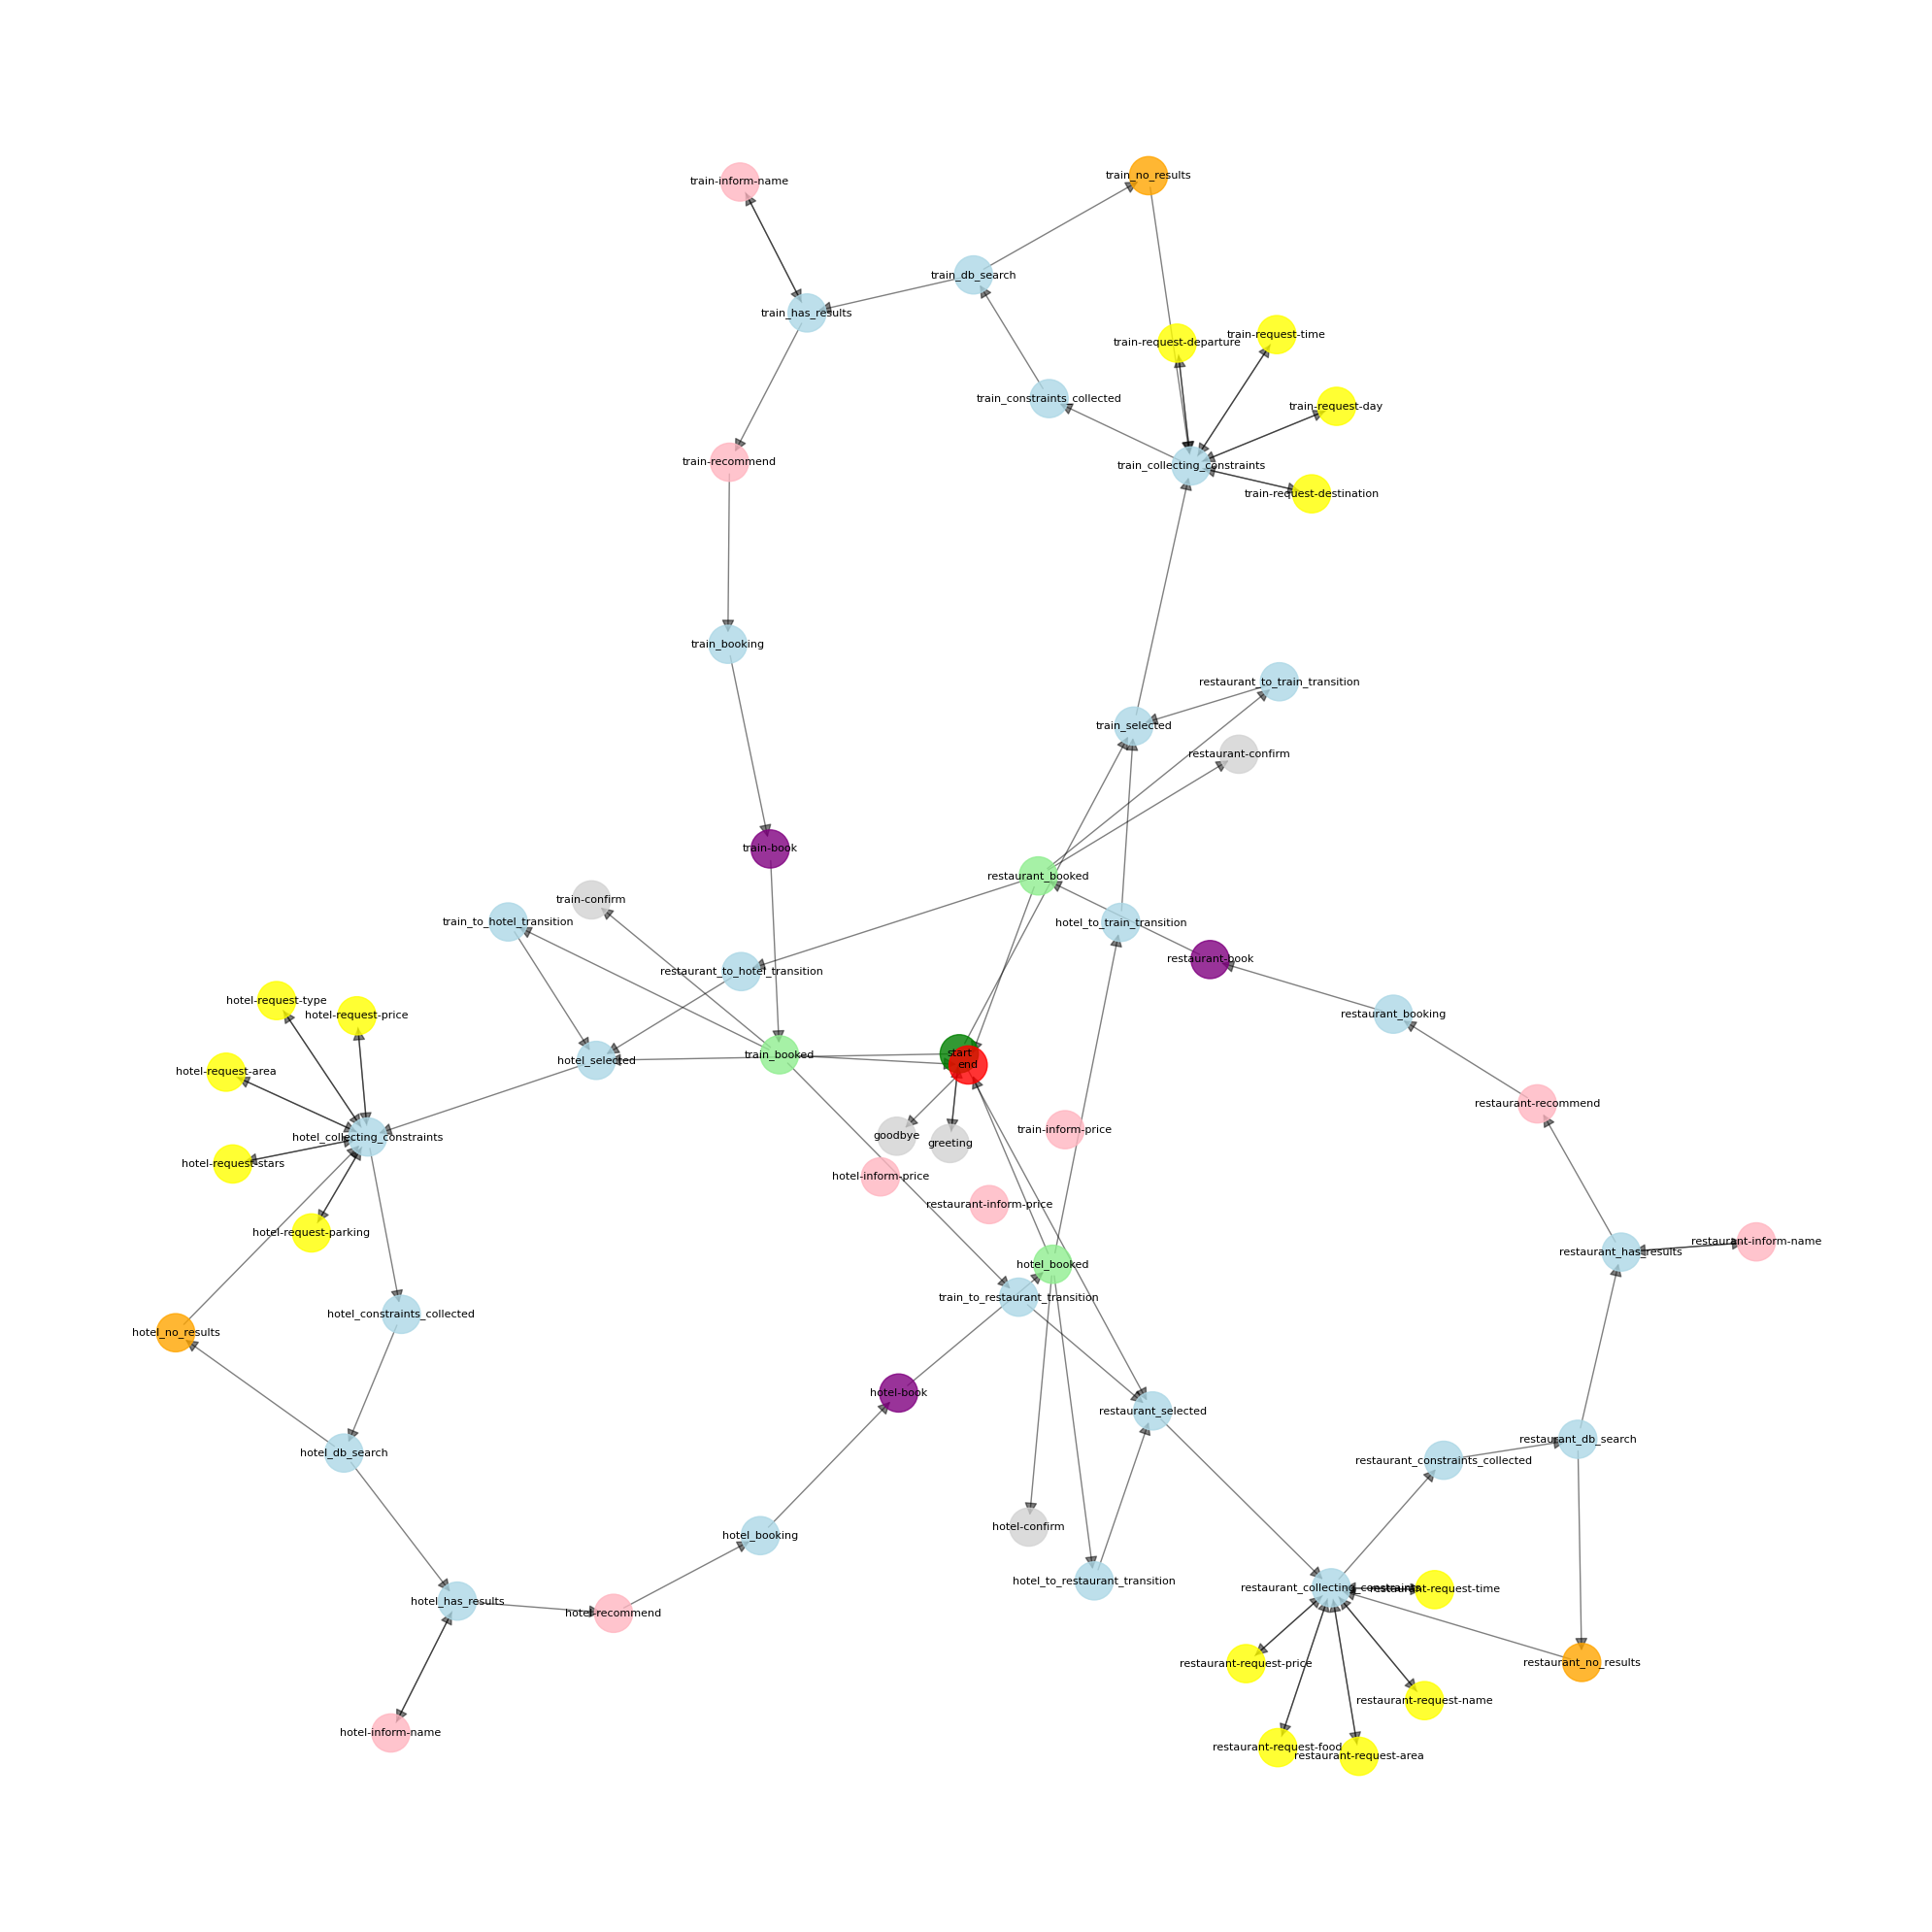

hotel 도메인 상태-행동 공간 시각화


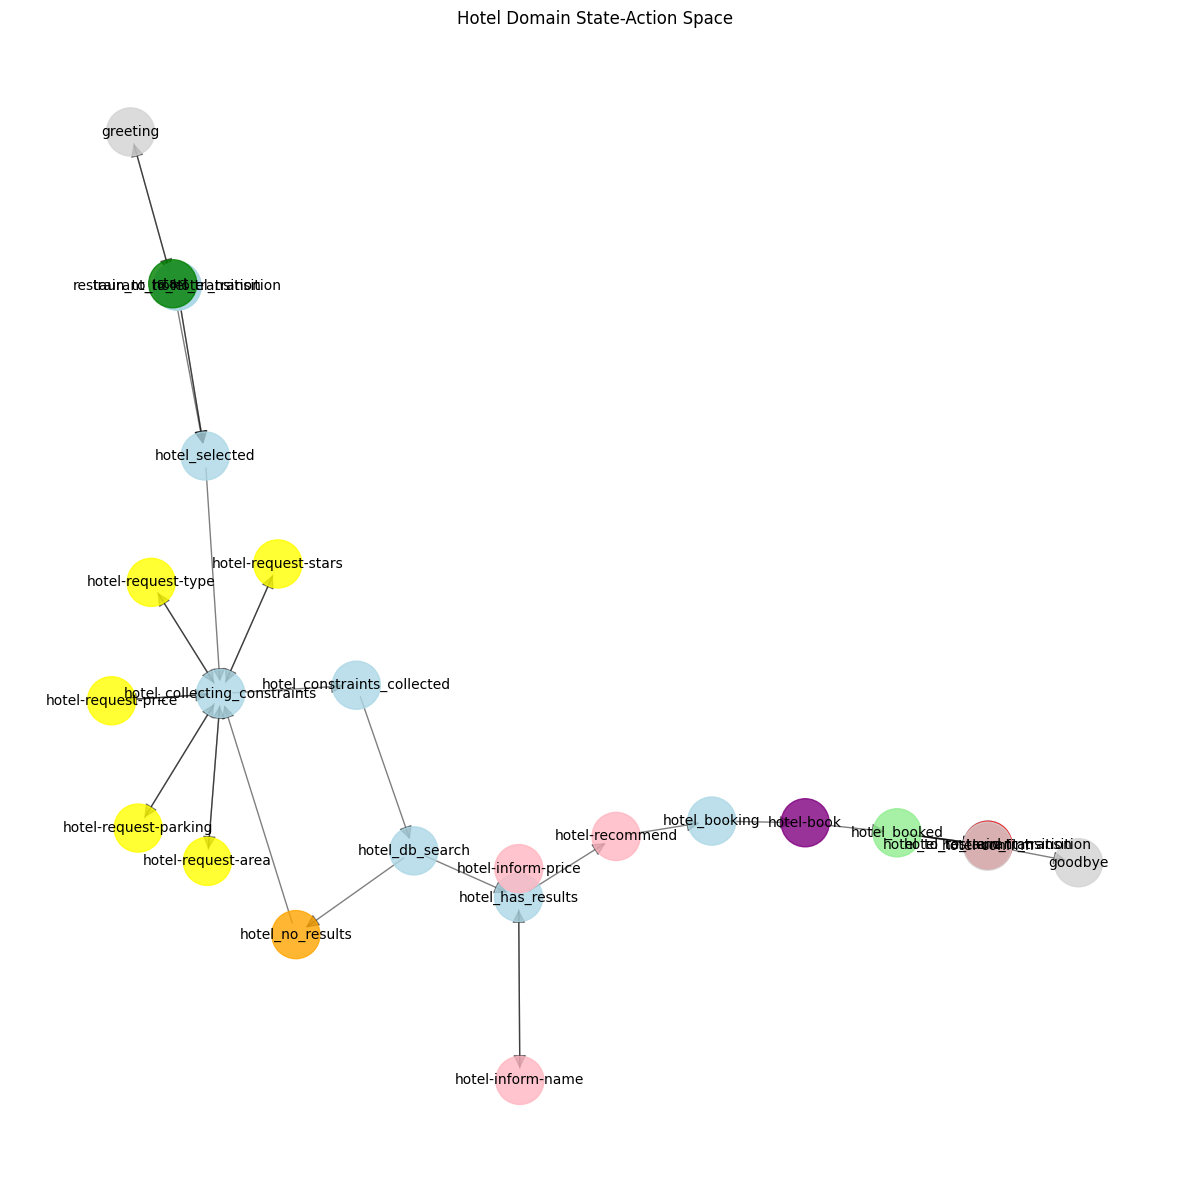

restaurant 도메인 상태-행동 공간 시각화


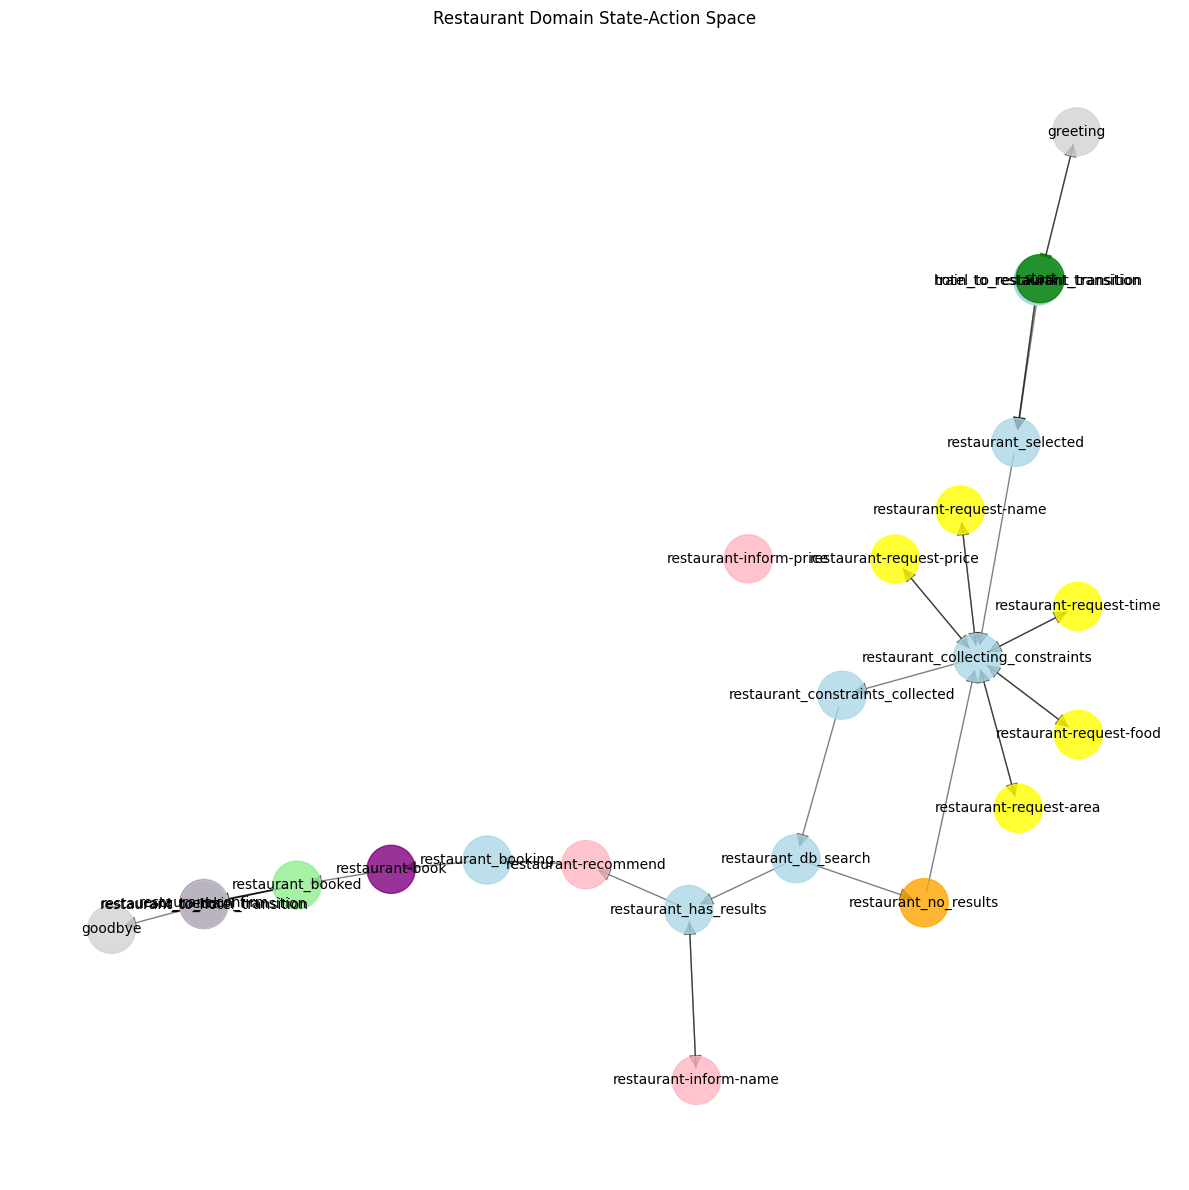

train 도메인 상태-행동 공간 시각화


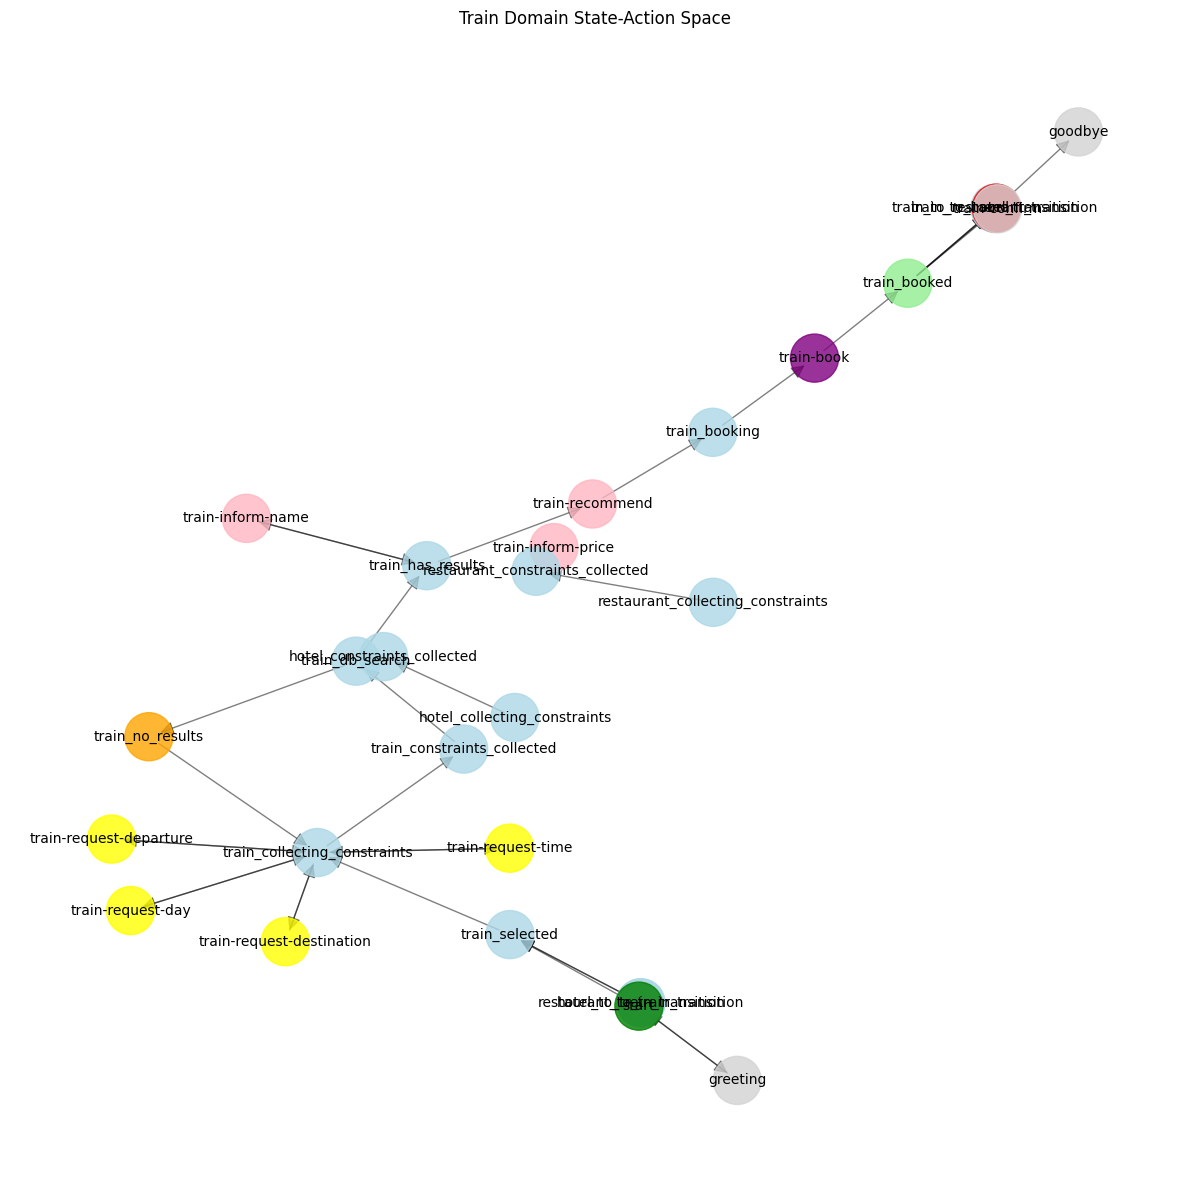


상태-행동 공간 통계:
상태 수: 32
행동 수: 31
전이 수: 88

샘플 대화 경로:
start -> hotel_selected
hotel_selected -> hotel_collecting_constraints
hotel_collecting_constraints -> hotel-request-price
hotel-request-price -> hotel_collecting_constraints
hotel_collecting_constraints -> hotel-request-area
hotel-request-area -> hotel_collecting_constraints
hotel_collecting_constraints -> hotel_constraints_collected
hotel_constraints_collected -> hotel_db_search
hotel_db_search -> hotel_has_results
hotel_has_results -> hotel-inform-name
hotel-inform-name -> hotel_has_results
hotel_has_results -> hotel-recommend
hotel-recommend -> hotel_booking
hotel_booking -> hotel-book
hotel-book -> hotel_booked
hotel_booked -> end
end -> goodbye


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json

class MultiWOZStateActionSpace:
    def __init__(self):
        # 도메인 정의
        self.domains = ['hotel', 'restaurant', 'train']
        
        # 슬롯 정의
        self.slots = {
            'hotel': ['price', 'type', 'area', 'stars', 'parking'],
            'restaurant': ['price', 'food', 'area', 'name', 'time'],
            'train': ['departure', 'destination', 'day', 'time']
        }
        
        # 가능한 슬롯 값 정의
        self.slot_values = {
            'price': ['cheap', 'moderate', 'expensive'],
            'area': ['centre', 'north', 'south', 'east', 'west'],
            'stars': [3, 4, 5],
            'parking': ['yes', 'no'],
            'food': ['italian', 'chinese', 'indian', 'french', 'british'],
            'day': ['monday', 'tuesday', 'wednesday', 'thursday', 'friday'],
            'time': ['morning', 'afternoon', 'evening'],
            'departure': ['cambridge', 'london', 'stansted'],
            'destination': ['cambridge', 'london', 'stansted']
        }
        
        # 대화 행위 정의
        self.dialog_acts = ['greeting', 'request', 'inform', 'recommend', 'book', 'confirm', 'goodbye']
        
        # 상태 공간 생성
        self.states = self._generate_simplified_state_space()
        
        # 행동 공간 생성
        self.actions = self._generate_simplified_action_space()
        
        # 그래프 생성
        self.graph = self._build_state_action_graph()
    
    def _generate_simplified_state_space(self):
        """간소화된 상태 공간 생성"""
        states = []
        
        # 시작 상태
        states.append("start")
        
        # 도메인별 간소화된 상태
        for domain in self.domains:
            # 도메인 선택 상태
            states.append(f"{domain}_selected")
            
            # 슬롯 채우기 단계별 상태 (간소화)
            states.append(f"{domain}_collecting_constraints")
            states.append(f"{domain}_constraints_collected")
            
            # DB 검색 상태
            states.append(f"{domain}_db_search")
            
            # 결과 상태
            states.append(f"{domain}_no_results")
            states.append(f"{domain}_has_results")
            
            # 예약 상태
            states.append(f"{domain}_booking")
            states.append(f"{domain}_booked")
        
        # 다중 도메인 상태
        for domain1 in self.domains:
            for domain2 in self.domains:
                if domain1 != domain2:
                    states.append(f"{domain1}_to_{domain2}_transition")
        
        # 종료 상태
        states.append("end")
        
        return states
    
    def _generate_simplified_action_space(self):
        """간소화된 행동 공간 생성"""
        actions = []
        
        # 일반 행동
        actions.append("greeting")
        actions.append("goodbye")
        
        for domain in self.domains:
            # 도메인별 행동
            for act in ['request', 'inform', 'recommend', 'book', 'confirm']:
                if act == 'request':
                    # 슬롯별 요청 행동
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                elif act == 'inform':
                    # 주요 정보 제공 행동 몇 가지만 포함
                    actions.append(f"{domain}-{act}-name")
                    actions.append(f"{domain}-{act}-price")
                else:
                    # 기타 행동은 도메인 수준으로 간소화
                    actions.append(f"{domain}-{act}")
        
        return actions
    
    def _build_state_action_graph(self):
        """상태-행동 그래프 구축"""
        G = nx.DiGraph()
        
        # 모든 상태를 노드로 추가
        for state in self.states:
            G.add_node(state, type='state')
        
        # 모든 행동을 노드로 추가
        for action in self.actions:
            G.add_node(action, type='action')
        
        # 상태-행동-상태 전이 정의
        
        # 시작 -> 인사
        G.add_edge("start", "greeting")
        G.add_edge("greeting", "start")  # 첫 인사 후 다시 시작 상태로
        
        # 도메인 선택
        for domain in self.domains:
            G.add_edge("start", f"{domain}_selected")
            
            # 제약조건 수집
            G.add_edge(f"{domain}_selected", f"{domain}_collecting_constraints")
            
            # 슬롯별 요청 행동
            for slot in self.slots.get(domain, []):
                request_action = f"{domain}-request-{slot}"
                G.add_edge(f"{domain}_collecting_constraints", request_action)
                G.add_edge(request_action, f"{domain}_collecting_constraints")
            
            # 제약조건 수집 완료
            G.add_edge(f"{domain}_collecting_constraints", f"{domain}_constraints_collected")
            
            # DB 검색
            G.add_edge(f"{domain}_constraints_collected", f"{domain}_db_search")
            
            # 검색 결과에 따른 상태
            G.add_edge(f"{domain}_db_search", f"{domain}_no_results")
            G.add_edge(f"{domain}_db_search", f"{domain}_has_results")
            
            # 결과 없음 -> 다시 제약조건 수집
            G.add_edge(f"{domain}_no_results", f"{domain}_collecting_constraints")
            
            # 결과 있음 -> 정보 제공 및 추천
            inform_action = f"{domain}-inform-name"
            recommend_action = f"{domain}-recommend"
            
            G.add_edge(f"{domain}_has_results", inform_action)
            G.add_edge(inform_action, f"{domain}_has_results")
            
            G.add_edge(f"{domain}_has_results", recommend_action)
            G.add_edge(recommend_action, f"{domain}_booking")
            
            # 예약
            book_action = f"{domain}-book"
            G.add_edge(f"{domain}_booking", book_action)
            G.add_edge(book_action, f"{domain}_booked")
            
            # 예약 확인
            confirm_action = f"{domain}-confirm"
            G.add_edge(f"{domain}_booked", confirm_action)
            
            # 예약 후 종료 또는 다른 도메인으로 전환
            G.add_edge(f"{domain}_booked", "end")
            
            # 도메인 간 전환
            for other_domain in self.domains:
                if domain != other_domain:
                    transition_state = f"{domain}_to_{other_domain}_transition"
                    G.add_edge(f"{domain}_booked", transition_state)
                    G.add_edge(transition_state, f"{other_domain}_selected")
        
        # 종료 행동
        G.add_edge("end", "goodbye")
        
        return G

    def visualize_graph(self, layout_type='spring', figsize=(20, 20), save_path=None):
        """그래프 시각화"""
        plt.figure(figsize=figsize)
        
        # 노드 타입에 따른 색상 설정
        node_colors = []
        for node in self.graph.nodes():
            if self.graph.nodes[node]['type'] == 'state':
                if node == 'start':
                    node_colors.append('green')
                elif node == 'end':
                    node_colors.append('red')
                elif '_booked' in node:
                    node_colors.append('lightgreen')
                elif '_no_results' in node:
                    node_colors.append('orange')
                else:
                    node_colors.append('lightblue')
            else:  # action 노드
                if 'request' in node:
                    node_colors.append('yellow')
                elif 'inform' in node or 'recommend' in node:
                    node_colors.append('lightpink')
                elif 'book' in node:
                    node_colors.append('purple')
                else:
                    node_colors.append('lightgray')
        
        # 레이아웃 선택
        if layout_type == 'spring':
            pos = nx.spring_layout(self.graph, k=0.5, iterations=50, seed=42)
        elif layout_type == 'circular':
            pos = nx.circular_layout(self.graph)
        elif layout_type == 'kamada_kawai':
            pos = nx.kamada_kawai_layout(self.graph)
        elif layout_type == 'spectral':
            pos = nx.spectral_layout(self.graph)
        else:
            pos = nx.spring_layout(self.graph)
        
        # 노드 그리기
        nx.draw_networkx_nodes(
            self.graph, pos, 
            node_size=800, 
            node_color=node_colors, 
            alpha=0.8
        )
        
        # 엣지 그리기
        nx.draw_networkx_edges(
            self.graph, pos, 
            arrows=True, 
            arrowsize=20, 
            alpha=0.5
        )
        
        # 라벨 그리기
        nx.draw_networkx_labels(
            self.graph, pos, 
            font_size=8, 
            font_family='sans-serif'
        )
        
        plt.axis('off')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def visualize_domain_subgraph(self, domain, layout_type='spring', figsize=(12, 12), save_path=None):
        """특정 도메인의 부분 그래프 시각화"""
        # 도메인 관련 노드 선택
        domain_nodes = [node for node in self.graph.nodes() if 
                       (domain in node or node in ['start', 'end', 'greeting', 'goodbye'])]
        
        # 부분 그래프 생성
        subgraph = self.graph.subgraph(domain_nodes)
        
        plt.figure(figsize=figsize)
        
        # 노드 타입에 따른 색상 설정
        node_colors = []
        for node in subgraph.nodes():
            if self.graph.nodes[node]['type'] == 'state':
                if node == 'start':
                    node_colors.append('green')
                elif node == 'end':
                    node_colors.append('red')
                elif '_booked' in node:
                    node_colors.append('lightgreen')
                elif '_no_results' in node:
                    node_colors.append('orange')
                else:
                    node_colors.append('lightblue')
            else:  # action 노드
                if 'request' in node:
                    node_colors.append('yellow')
                elif 'inform' in node or 'recommend' in node:
                    node_colors.append('lightpink')
                elif 'book' in node:
                    node_colors.append('purple')
                else:
                    node_colors.append('lightgray')
        
        # 레이아웃 선택
        if layout_type == 'spring':
            pos = nx.spring_layout(subgraph, k=0.5, iterations=50, seed=42)
        elif layout_type == 'circular':
            pos = nx.circular_layout(subgraph)
        elif layout_type == 'kamada_kawai':
            pos = nx.kamada_kawai_layout(subgraph)
        elif layout_type == 'spectral':
            pos = nx.spectral_layout(subgraph)
        else:
            pos = nx.spring_layout(subgraph)
        
        # 노드 그리기
        nx.draw_networkx_nodes(
            subgraph, pos, 
            node_size=1200, 
            node_color=node_colors, 
            alpha=0.8
        )
        
        # 엣지 그리기
        nx.draw_networkx_edges(
            subgraph, pos, 
            arrows=True, 
            arrowsize=20, 
            alpha=0.5
        )
        
        # 라벨 그리기
        nx.draw_networkx_labels(
            subgraph, pos, 
            font_size=10, 
            font_family='sans-serif'
        )
        
        plt.title(f"{domain.capitalize()} Domain State-Action Space")
        plt.axis('off')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        plt.show()
    
    def export_graph_json(self, file_path):
        """그래프 구조를 JSON으로 내보내기"""
        graph_data = {
            "nodes": [],
            "links": []
        }
        
        # 노드 정보 추가
        for node in self.graph.nodes():
            node_type = self.graph.nodes[node]['type']
            color = 'lightblue' if node_type == 'state' else 'lightgray'
            
            if node_type == 'state':
                if node == 'start':
                    color = 'green'
                elif node == 'end':
                    color = 'red'
                elif '_booked' in node:
                    color = 'lightgreen'
                elif '_no_results' in node:
                    color = 'orange'
            else:  # action 노드
                if 'request' in node:
                    color = 'yellow'
                elif 'inform' in node or 'recommend' in node:
                    color = 'lightpink'
                elif 'book' in node:
                    color = 'purple'
            
            graph_data["nodes"].append({
                "id": node,
                "type": node_type,
                "color": color
            })
        
        # 엣지 정보 추가
        for source, target in self.graph.edges():
            graph_data["links"].append({
                "source": source,
                "target": target
            })
        
        # JSON 파일로 저장
        with open(file_path, 'w') as f:
            json.dump(graph_data, f, indent=2)

def visualize_multiwoz_state_action_space():
    # 상태-행동 공간 객체 생성
    mdp_space = MultiWOZStateActionSpace()
    
    # 전체 그래프 시각화
    print("전체 상태-행동 공간 시각화")
    mdp_space.visualize_graph(layout_type='kamada_kawai')
    
    # 도메인별 부분 그래프 시각화
    for domain in mdp_space.domains:
        print(f"{domain} 도메인 상태-행동 공간 시각화")
        mdp_space.visualize_domain_subgraph(domain, layout_type='kamada_kawai')
    
    # 전체 그래프 구조 출력
    print("\n상태-행동 공간 통계:")
    print(f"상태 수: {len([n for n, d in mdp_space.graph.nodes(data=True) if d['type'] == 'state'])}")
    print(f"행동 수: {len([n for n, d in mdp_space.graph.nodes(data=True) if d['type'] == 'action'])}")
    print(f"전이 수: {mdp_space.graph.number_of_edges()}")
    
    # 그래프 구조 JSON으로 내보내기
    mdp_space.export_graph_json("multiwoz_state_action_graph.json")
    
    # 간단한 샘플 경로 표시
    print("\n샘플 대화 경로:")
    sample_path = [
        "start",
        "hotel_selected",
        "hotel_collecting_constraints",
        "hotel-request-price",
        "hotel_collecting_constraints",
        "hotel-request-area",
        "hotel_collecting_constraints",
        "hotel_constraints_collected",
        "hotel_db_search",
        "hotel_has_results",
        "hotel-inform-name",
        "hotel_has_results",
        "hotel-recommend",
        "hotel_booking",
        "hotel-book",
        "hotel_booked",
        "end",
        "goodbye"
    ]
    
    for i in range(len(sample_path) - 1):
        if mdp_space.graph.has_edge(sample_path[i], sample_path[i+1]):
            print(f"{sample_path[i]} -> {sample_path[i+1]}")
        else:
            print(f"[경로 오류] {sample_path[i]} -> {sample_path[i+1]}")

if __name__ == "__main__":
    visualize_multiwoz_state_action_space()

In [20]:
from flask import Flask, jsonify
from flask_cors import CORS
import networkx as nx
import json

app = Flask(__name__)
CORS(app)  # 크로스 오리진 요청 허용

class MultiWOZStateActionSpace:
    def __init__(self):
        # 도메인 정의
        self.domains = ['hotel', 'restaurant', 'train']
        
        # 슬롯 정의
        self.slots = {
            'hotel': ['price', 'type', 'area', 'stars', 'parking'],
            'restaurant': ['price', 'food', 'area', 'name', 'time'],
            'train': ['departure', 'destination', 'day', 'time']
        }
        
        # 대화 행위 정의
        self.dialog_acts = ['greeting', 'request', 'inform', 'recommend', 'book', 'confirm', 'goodbye']
        
        # 상태 공간 생성
        self.states = self._generate_simplified_state_space()
        
        # 행동 공간 생성
        self.actions = self._generate_simplified_action_space()
        
        # 그래프 생성
        self.graph = self._build_state_action_graph()
    
    def _generate_simplified_state_space(self):
        """간소화된 상태 공간 생성"""
        states = []
        
        # 시작 상태
        states.append("start")
        
        # 도메인별 간소화된 상태
        for domain in self.domains:
            # 도메인 선택 상태
            states.append(f"{domain}_selected")
            
            # 슬롯 채우기 단계별 상태 (간소화)
            states.append(f"{domain}_collecting_constraints")
            states.append(f"{domain}_constraints_collected")
            
            # DB 검색 상태
            states.append(f"{domain}_db_search")
            
            # 결과 상태
            states.append(f"{domain}_no_results")
            states.append(f"{domain}_has_results")
            
            # 예약 상태
            states.append(f"{domain}_booking")
            states.append(f"{domain}_booked")
        
        # 다중 도메인 상태
        for domain1 in self.domains:
            for domain2 in self.domains:
                if domain1 != domain2:
                    states.append(f"{domain1}_to_{domain2}_transition")
        
        # 종료 상태
        states.append("end")
        
        return states
    
    def _generate_simplified_action_space(self):
        """간소화된 행동 공간 생성"""
        actions = []
        
        # 일반 행동
        actions.append("greeting")
        actions.append("goodbye")
        
        for domain in self.domains:
            # 도메인별 행동
            for act in ['request', 'inform', 'recommend', 'book', 'confirm']:
                if act == 'request':
                    # 슬롯별 요청 행동
                    for slot in self.slots.get(domain, []):
                        actions.append(f"{domain}-{act}-{slot}")
                elif act == 'inform':
                    # 주요 정보 제공 행동 몇 가지만 포함
                    actions.append(f"{domain}-{act}-name")
                    actions.append(f"{domain}-{act}-price")
                else:
                    # 기타 행동은 도메인 수준으로 간소화
                    actions.append(f"{domain}-{act}")
        
        return actions
    
    def _build_state_action_graph(self):
        """상태-행동 그래프 구축"""
        G = nx.DiGraph()
        
        # 모든 상태를 노드로 추가
        for state in self.states:
            # 도메인 추출
            domain = None
            for d in self.domains:
                if state.startswith(d + "_"):
                    domain = d
                    break
            
            # 노드 색상 설정
            if state == 'start':
                color = 'green'
            elif state == 'end':
                color = 'red'
            elif '_booked' in state:
                color = 'lightgreen'
            elif '_no_results' in state:
                color = 'orange'
            else:
                color = 'lightblue'
            
            G.add_node(state, type='state', color=color, domain=domain)
        
        # 모든 행동을 노드로 추가
        for action in self.actions:
            # 도메인 추출
            domain = None
            for d in self.domains:
                if action.startswith(d + "-"):
                    domain = d
                    break
            
            # 행동 유형 추출
            act_type = None
            if '-' in action:
                act_type = action.split('-')[1]
            
            # 노드 색상 설정
            if 'request' in action:
                color = 'yellow'
            elif 'inform' in action or 'recommend' in action:
                color = 'lightpink'
            elif 'book' in action:
                color = 'purple'
            else:
                color = 'lightgray'
            
            G.add_node(action, type='action', color=color, domain=domain, act_type=act_type)
        
        # 상태-행동-상태 전이 정의
        
        # 시작 -> 인사
        G.add_edge("start", "greeting")
        G.add_edge("greeting", "start")  # 첫 인사 후 다시 시작 상태로
        
        # 도메인 선택
        for domain in self.domains:
            G.add_edge("start", f"{domain}_selected")
            
            # 제약조건 수집
            G.add_edge(f"{domain}_selected", f"{domain}_collecting_constraints")
            
            # 슬롯별 요청 행동
            for slot in self.slots.get(domain, []):
                request_action = f"{domain}-request-{slot}"
                G.add_edge(f"{domain}_collecting_constraints", request_action)
                G.add_edge(request_action, f"{domain}_collecting_constraints")
            
            # 제약조건 수집 완료
            G.add_edge(f"{domain}_collecting_constraints", f"{domain}_constraints_collected")
            
            # DB 검색
            G.add_edge(f"{domain}_constraints_collected", f"{domain}_db_search")
            
            # 검색 결과에 따른 상태
            G.add_edge(f"{domain}_db_search", f"{domain}_no_results")
            G.add_edge(f"{domain}_db_search", f"{domain}_has_results")
            
            # 결과 없음 -> 다시 제약조건 수집
            G.add_edge(f"{domain}_no_results", f"{domain}_collecting_constraints")
            
            # 결과 있음 -> 정보 제공 및 추천
            inform_action = f"{domain}-inform-name"
            recommend_action = f"{domain}-recommend"
            
            G.add_edge(f"{domain}_has_results", inform_action)
            G.add_edge(inform_action, f"{domain}_has_results")
            
            G.add_edge(f"{domain}_has_results", recommend_action)
            G.add_edge(recommend_action, f"{domain}_booking")
            
            # 예약
            book_action = f"{domain}-book"
            G.add_edge(f"{domain}_booking", book_action)
            G.add_edge(book_action, f"{domain}_booked")
            
            # 예약 확인
            confirm_action = f"{domain}-confirm"
            G.add_edge(f"{domain}_booked", confirm_action)
            
            # 예약 후 종료 또는 다른 도메인으로 전환
            G.add_edge(f"{domain}_booked", "end")
            
            # 도메인 간 전환
            for other_domain in self.domains:
                if domain != other_domain:
                    transition_state = f"{domain}_to_{other_domain}_transition"
                    G.add_edge(f"{domain}_booked", transition_state)
                    G.add_edge(transition_state, f"{other_domain}_selected")
        
        # 종료 행동
        G.add_edge("end", "goodbye")
        
        return G
    
    def get_graph_data(self):
        """그래프 데이터를 JSON 형식으로 변환"""
        nodes = []
        for node, attrs in self.graph.nodes(data=True):
            node_data = {
                "id": node,
                "label": node.replace('_', ' '),
                "type": attrs.get('type', 'unknown'),
                "color": attrs.get('color', 'gray'),
                "domain": attrs.get('domain', None)
            }
            nodes.append(node_data)
        
        links = []
        for source, target in self.graph.edges():
            links.append({
                "source": source,
                "target": target
            })
        
        return {
            "nodes": nodes,
            "links": links
        }

# API 엔드포인트 정의
@app.route('/api/graph', methods=['GET'])
def get_graph():
    mdp_space = MultiWOZStateActionSpace()
    graph_data = mdp_space.get_graph_data()
    return jsonify(graph_data)

@app.route('/api/graph/<domain>', methods=['GET'])
def get_domain_graph(domain):
    mdp_space = MultiWOZStateActionSpace()
    graph_data = mdp_space.get_graph_data()
    
    if domain == 'all':
        return jsonify(graph_data)
    
    # 특정 도메인에 속한 노드 필터링
    domain_nodes = [node for node in graph_data["nodes"] 
                   if node["domain"] == domain or 
                   node["id"] in ['start', 'end', 'greeting', 'goodbye']]
    
    domain_node_ids = set(node["id"] for node in domain_nodes)
    
    # 해당하는 링크만 필터링
    domain_links = [link for link in graph_data["links"] 
                   if link["source"] in domain_node_ids and link["target"] in domain_node_ids]
    
    return jsonify({
        "nodes": domain_nodes,
        "links": domain_links
    })

# 웹 서버 시작
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/hyegang/Desktop/졸업논문/.venv/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
    ~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/hyegang/Desktop/졸업논문/.venv/lib/python3.13/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
    ~~~~~~~~~~~~~~^^^^^^
  File "/Users/hyegang/Desktop/졸업논문/.venv/lib/python3.13/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/Users/hyegang/Desktop/졸업논문/.venv/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
    ~~~~~~~~~~~~~~~~~^^
  File "/Users/hyegang/Desktop/졸업논문/.venv/lib/

SystemExit: 1

In [17]:
!pip install flask_cors